# Comprehensive Analysis of Delhi Metro Network

## Introduction:
Delhi Metro, one of India's largest and busiest metro networks, serves as a lifeline for the city's residents. This project aims to provide a _**comprehensive analysis**_ of the Delhi Metro network, <br> focusing on various aspects such as _geospatial distribution, temporal trends, line-wise analysis, and station layout insights_. By leveraging data visualization techniques and analytical tools, we seek to gain valuable insights into the functioning and characteristics of the Delhi Metro system.

## Dataset Overview:
The dataset used for this analysis contains information about Delhi Metro stations, one of the largest and busiest urban transit systems in the world. Key features of the dataset include: <br>

|        |  Features                                                 |
|:------------------|:---------------------------------------------------------------|
| Station Information |  **Names and IDs** of metro stations.          |
| Geographical Coordinates | **Latitude and longitude** of each station. |
| Line Information|The **specific metro line** each station belongs to.  |
|Distance Data| The **distance** of each station from the start of its line. |
|Station Layout|Type of **station layout** (e.g., Elevated, Underground, At-Grade).   |
|Opening Date | **Date of inauguration** of each station.  |

![Metro Image](delhi-metro-1200-667.jpg)

## Importing libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Loading the Dataset

In [2]:
metro_data = pd.read_csv("Delhi-Metro-Network.csv")
metro_data.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260


## Exploratory Data Analysis (EDA)

In [3]:
rows = metro_data.shape[0]
column = metro_data.shape[1]
print(f"Dataset has {rows} Rows and {column} Columns")
metro_data.shape

Dataset has 285 Rows and 8 Columns


(285, 8)

In [4]:
metro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station ID                285 non-null    int64  
 1   Station Name              285 non-null    object 
 2   Distance from Start (km)  285 non-null    float64
 3   Line                      285 non-null    object 
 4   Opening Date              285 non-null    object 
 5   Station Layout            285 non-null    object 
 6   Latitude                  285 non-null    float64
 7   Longitude                 285 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.9+ KB


In [5]:
metro_data.duplicated().sum()

0

Insight:

* No null values are there
* No duplicates

## Data Preprocessing:

Making data type appropriate.

In [6]:
# converting 'Opening Date' to datetime format
metro_data['Opening Date'] = pd.to_datetime(metro_data['Opening Date'])

In [7]:
metro_data.dtypes

Station ID                           int64
Station Name                        object
Distance from Start (km)           float64
Line                                object
Opening Date                datetime64[ns]
Station Layout                      object
Latitude                           float64
Longitude                          float64
dtype: object

### Geospatial Analysis
Visualizing the locations of the metro stations on a map. It will give us an insight into the geographical distribution of the stations across Delhi by using the latitude and longitude data to plot each station.

In [8]:
# defining a color scheme for the metro lines
line_colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}

delhi_map_with_line_tooltip = folium.Map(location=[28.7041, 77.1025], zoom_start=11)

In [9]:
# adding colored markers for each metro station with line name in tooltip
for index, row in metro_data.iterrows():
    line = row['Line']
    color = line_colors.get(line, 'black')  # Default color is black if line not found in the dictionary
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']}",
        tooltip=f"{row['Station Name']}, {line}",
        icon=folium.Icon(color=color)
    ).add_to(delhi_map_with_line_tooltip)

In [10]:
# Displaying the map
delhi_map_with_line_tooltip

**Overview:**<br>
Utilized Folium library to create an interactive map displaying the geographical distribution of metro stations. Each station is marked with a colored marker corresponding to its metro line, providing insights into the network's spatial layout.<br>

**Insight :** <br>
This map provides a visual understanding of how the metro stations are spread across Delhi.

### Temporal Analysis

Analyzing the growth of the Delhi Metro network over time by looking at how many stations were opened each year and visualize them.

In [17]:
min_year = (metro_data['Opening Date']).dt.year.min()
max_year = (metro_data['Opening Date']).dt.year.max()

In [23]:
#all years in the range
all_years_df = pd.DataFrame({'Year': range(min_year, max_year + 1)})

# Merge with metro_data to fill in missing years with zero stations opened
merged_df = all_years_df.merge(metro_data.groupby(metro_data['Opening Date'].dt.year).size().reset_index(name='Number of Stations'),left_on='Year', right_on='Opening Date', how='left').fillna(0)
merged_df

,Year,Opening Date,Number of Stations
0,2002,2002.0,6.0
1,2003,2003.0,4.0
2,2004,2004.0,11.0
3,2005,2005.0,28.0
4,2006,2006.0,9.0
5,2007,0.0,0.0
6,2008,2008.0,3.0
7,2009,2009.0,17.0
8,2010,2010.0,54.0
9,2011,2011.0,13.0


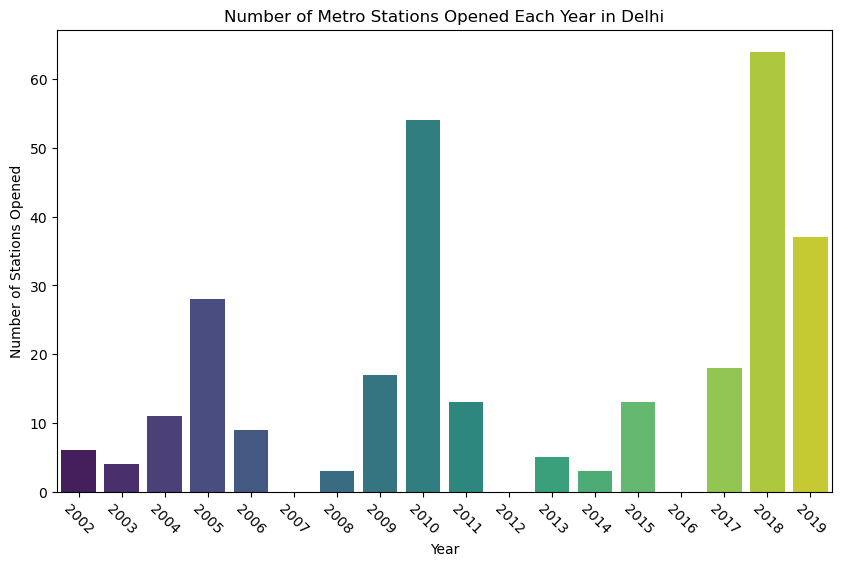

In [24]:
#visualising
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Number of Stations', data=merged_df, palette='viridis')
plt.title("Number of Metro Stations Opened Each Year in Delhi")
plt.xlabel("Year")
plt.ylabel("Number of Stations Opened")
plt.xticks(rotation=-45)
plt.show()

**Overview :** <br>
Examined the temporal trends by counting the number of stations opened each year. Visualized this information using Plotly to illustrate the growth of the Delhi Metro network over time, enabling us to understand the pace of expansion.

**Insights:** 
* Some years show a significant number of new station openings, indicating phases of _rapid network expansion_.
* Conversely, there are years with few or no new stations, which could be due to various factors like planning, funding, or construction challenges.

### Line Analysis

Analyzing various metro lines in terms of the number of stations they have and the average distance between stations. It will give us insights into the characteristics of each metro line, as which _lines are more extensive or denser_.

In [25]:
stations_per_line = metro_data['Line'].value_counts()

# calculating the total distance of each metro line (max distance from start)
total_distance_per_line = metro_data.groupby('Line')['Distance from Start (km)'].max()

avg_distance_per_line = total_distance_per_line / (stations_per_line - 1)

line_analysis = pd.DataFrame({
    'Line': stations_per_line.index,
    'Number of Stations': stations_per_line.values,
    'Avg. Distance Between Stations (km)': avg_distance_per_line
})

In [26]:
# sorting the DataFrame by the number of stations
line_analysis = line_analysis.sort_values(by='Number of Stations', ascending=False)

line_analysis.reset_index(drop=True, inplace=True)
print(line_analysis)

                 Line  Number of Stations  Avg. Distance Between Stations (km)
0           Blue line                  49                             1.355000
1           Pink line                  38                             1.097917
2         Yellow line                  37                             1.157143
3         Voilet line                  34                             1.950000
4            Red line                  29                             1.240000
5        Magenta line                  25                             1.050000
6           Aqua line                  21                             1.379167
7          Green line                  21                             4.160000
8         Rapid Metro                  11                             1.421622
9    Blue line branch                   8                             1.000000
10        Orange line                   6                             1.167857
11          Gray line                   3           

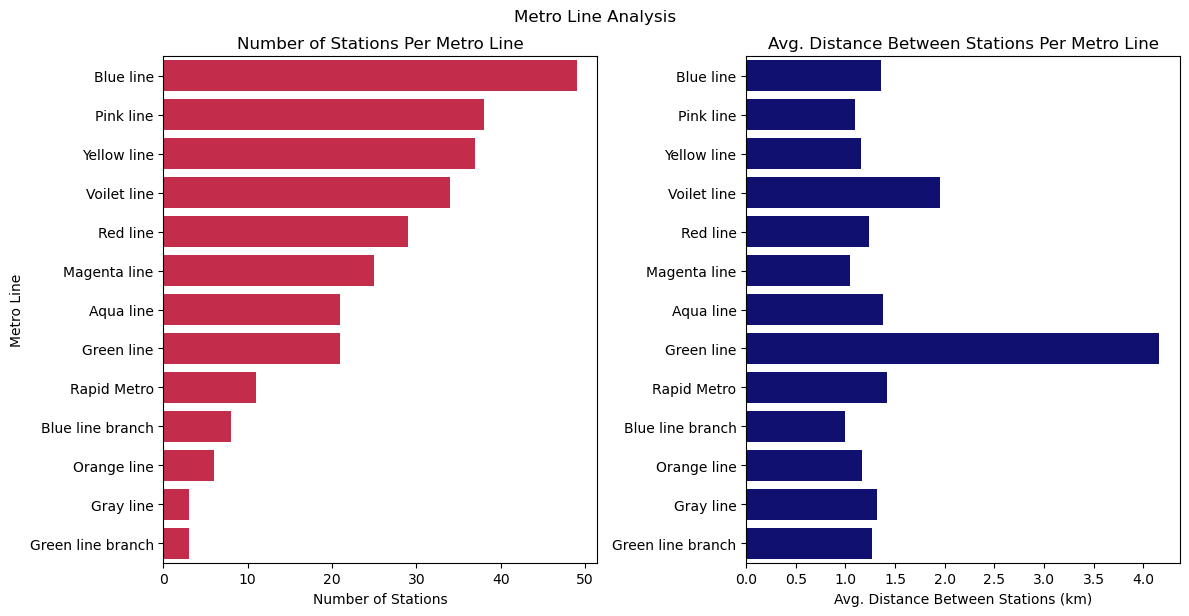

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Number of Stations per Line
sns.barplot(x='Number of Stations', y='Line', data=line_analysis, ax=axes[0], color='crimson')
axes[0].set_xlabel('Number of Stations')
axes[0].set_ylabel('Metro Line')
axes[0].set_title('Number of Stations Per Metro Line')

# Plot for Average Distance Between Stations
sns.barplot(x='Avg. Distance Between Stations (km)', y='Line', data=line_analysis, ax=axes[1], color='navy')
axes[1].set_xlabel('Avg. Distance Between Stations (km)')
axes[1].set_ylabel('')
axes[1].set_title('Avg. Distance Between Stations Per Metro Line')

# Adjust layout
plt.tight_layout()
plt.suptitle('Metro Line Analysis', y=1.02)

# Show plot
plt.show()

**Oveerview:** <br>
Conducted an in-depth analysis of each metro line, including the number of stations and average distance between stations. Created subplots to compare different lines, facilitating comparisons and identifying patterns in the network.

**Insights:**
* Blue line is most extensive and desner too.
* Though green has less station but average time per station is maximum.

### Station Layout Analysis

Analysing the distribution of station layouts across the network and see if there are any patterns or trends.

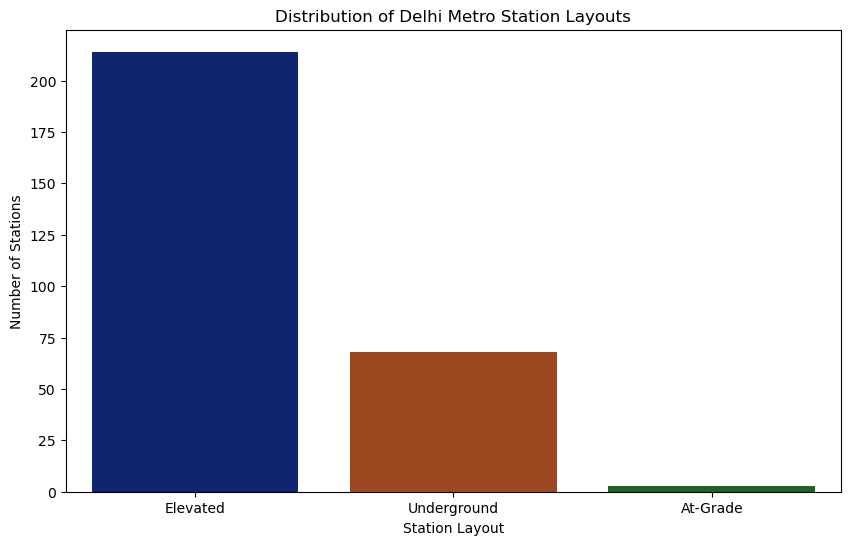

In [28]:
layout_counts = metro_data['Station Layout'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=layout_counts.index, y=layout_counts.values, palette='dark')

# Add labels and title
plt.xlabel('Station Layout')
plt.ylabel('Number of Stations')
plt.title('Distribution of Delhi Metro Station Layouts')

# Show plot
plt.show()

**Overview :** <br>
Explored the distribution of station layouts within the Delhi Metro network. Utilized a bar plot to showcase the prevalence of different station layouts, providing insights into the infrastructure and design aspects of metro stations.

**Insights:**
* _Elevated Stations_: The majority of the stations are Elevated. It is a common design choice in urban areas to save space and reduce land acquisition issues.
* _Underground Stations_: The Underground stations are fewer compared to elevated ones. These are likely in densely populated or central areas where above-ground construction is less feasible.
* _At-Grade Stations_: There are only a few At-Grade (ground level) stations, suggesting they are less common in the network, possibly due to land and traffic considerations.

### Conclusion:

Through this project, we've gained valuable insights into various facets of the Delhi Metro network, ranging from its spatial distribution to temporal growth patterns and infrastructure characteristics. Such analyses can be instrumental for urban planners, transportation authorities, and commuters alike, aiding in decision-making processes, optimization strategies, and overall understanding of the metro system's dynamics.